### Họ và tên: Trần Gia Long
### MSSV: N20DCCN035
### Lớp: D20CQCNPM01-N

## Phần 1

### Câu a

In [3]:
import numpy as np
import matplotlib.pylab as plt

In [4]:
def read_file(filename,size):
    img=np.fromfile(filename,dtype=np.uint8)
    img=img.reshape((size,size))
    return img
def full_scale_contrast(img):
    min=np.min(img)
    max=np.max(img)
    if min == max:
        return img
    scale=255/(max-min)
    img=(img-min)*scale
    img=np.round(img) # hoặc img=img.astype(np.uint8)
    return img

(256, 256)


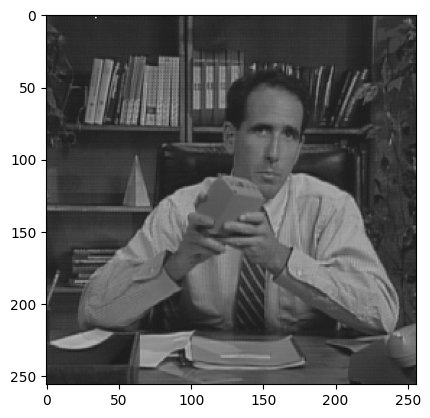

In [7]:
img=read_file('salesman.bin',256)
print(img.shape)
plt.imshow(img,cmap='gray')

In [27]:
img2= np.zeros((262,262)) # padding_image
img2[3:259,3:259]=img # 3 to 258 = 256
img3= np.zeros((262,262))# result
filter = np.ones((7,7))/49
for row in range(3,259):
    for col in range(3,259):
        img3[row,col]=np.sum(img2[row-3:row+4,col-3:col+4]*filter) # 3-3: 3+4 = 0:6 (range(0,7))

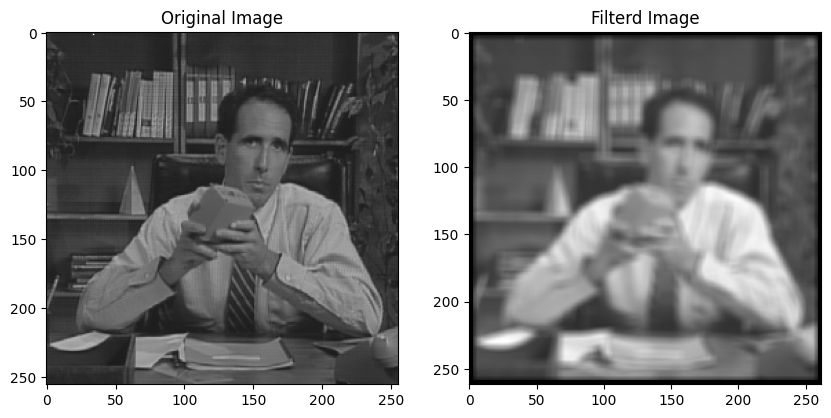

In [33]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')

plt.subplot(1,2,2)
plt.title('Filterd Image')
plt.imshow(full_scale_contrast(img3),cmap='gray')


### Câu b

In [114]:
H=np.zeros((128,128)) # impulse response image
center= 128//2
H[center-3:center+4,center-3:center+4]=1/49 # = np.ones((7,7))/49

In [115]:
zero_padded_size=256 + 128 - 1
print(zero_padded_size)

383


In [116]:
# zero_padded_original_img
ZPO=np.zeros((zero_padded_size,zero_padded_size))
ZPO[:256,:256]=img

# zero_padded_impulse_response_img
ZPI=np.zeros((zero_padded_size,zero_padded_size)) 
ZPI[:128,:128]=H

#DFT
ZPOtilde=np.fft.fft2(ZPO)
ZPItilde=np.fft.fft2(ZPI)

#centered DFT log-magnitude spectrum
ZPOtilde_center=np.log(1+np.abs(np.fft.fftshift(ZPOtilde)))
ZPItilde_center=np.log(1+np.abs(np.fft.fftshift(ZPItilde)))

#zero padded output image
OItilde= ZPOtilde* ZPItilde
OI= (np.fft.ifft2(OItilde)).real

#centered DFT log-magnitude spectrum of the zero padded output image
OItilde_center= np.log(1+np.abs(np.fft.fftshift(OItilde)))

#final 256 × 256 output image
FI=OI[64:320,64:320]


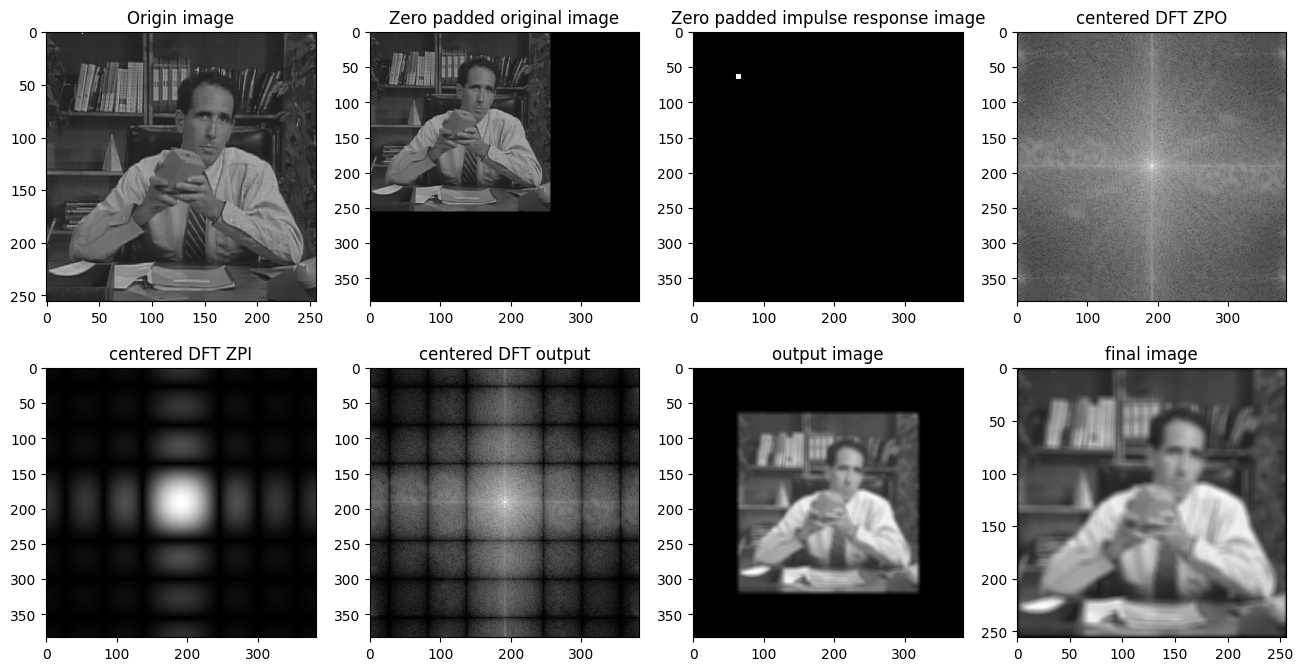

In [117]:
plt.figure(figsize=(16,8))

plt.subplot(2,4,1)
plt.title('Origin image')
plt.imshow(full_scale_contrast(img),cmap='gray')

plt.subplot(2,4,2)
plt.title('Zero padded original image')
plt.imshow(full_scale_contrast(ZPO),cmap='gray')

plt.subplot(2,4,3)
plt.title('Zero padded impulse response image')
plt.imshow(full_scale_contrast(ZPI),cmap='gray')

plt.subplot(2,4,4)
plt.title('centered DFT ZPO')
plt.imshow(full_scale_contrast(ZPOtilde_center),cmap='gray')

plt.subplot(2,4,5)
plt.title('centered DFT ZPI')
plt.imshow(full_scale_contrast(ZPItilde_center),cmap='gray')

plt.subplot(2,4,6)
plt.title('centered DFT output')
plt.imshow(full_scale_contrast(OItilde_center),cmap='gray')

plt.subplot(2,4,7)
plt.title('output image')
plt.imshow(full_scale_contrast(OI),cmap='gray')

plt.subplot(2,4,8)
plt.title('final image')
plt.imshow(full_scale_contrast(FI),cmap='gray')

In [118]:
#Verify that the output image is the same as the one in part (a)
#Y1a=img3, Y1b=FI
Y1a=full_scale_contrast(img3[3:262-3,3:262-3])
Y1b=full_scale_contrast(FI)
max_difference_before=np.max(np.abs(FI-img3[3:262-3,3:262-3]))
max_difference_after=np.max(np.abs(Y1b-Y1a))
print('Sự khác nhau Y1a và Y1b (chưa full scale constrast): '+str(max_difference_before))
print('Sự khác nhau Y1a và Y1b (full scale constrast): '+str(max_difference_after))

Sự khác nhau Y1a và Y1b (chưa full scale constrast): 2.8421709430404007e-13
Sự khác nhau Y1a và Y1b (full scale constrast): 0.0


### Câu c

In [120]:
#zero-phase impulse response image
H= np.zeros((256,256))
H[125:132,125:132]=1/49
H2=np.fft.fftshift(H)

# zero_padded_original_img
ZPO2=np.zeros((512,512))
ZPO2[:256,:256]=img

# zero padded zero-phase impulse response image
ZPI2=np.zeros((512,512)) 
ZPI2[:128,:128]=H2[:128,:128]
ZPI2[:128,384:512]=H2[:128,128:256]
ZPI2[384:512,:128]=H2[128:256,:128]
ZPI2[384:512,384:512]=H2[128:256,128:256]

#final 256 × 256 output image
FI2=np.fft.ifft2(np.fft.fft2(ZPO2)*np.fft.fft2(ZPI2))
FI2=FI2.real[:256,:256]

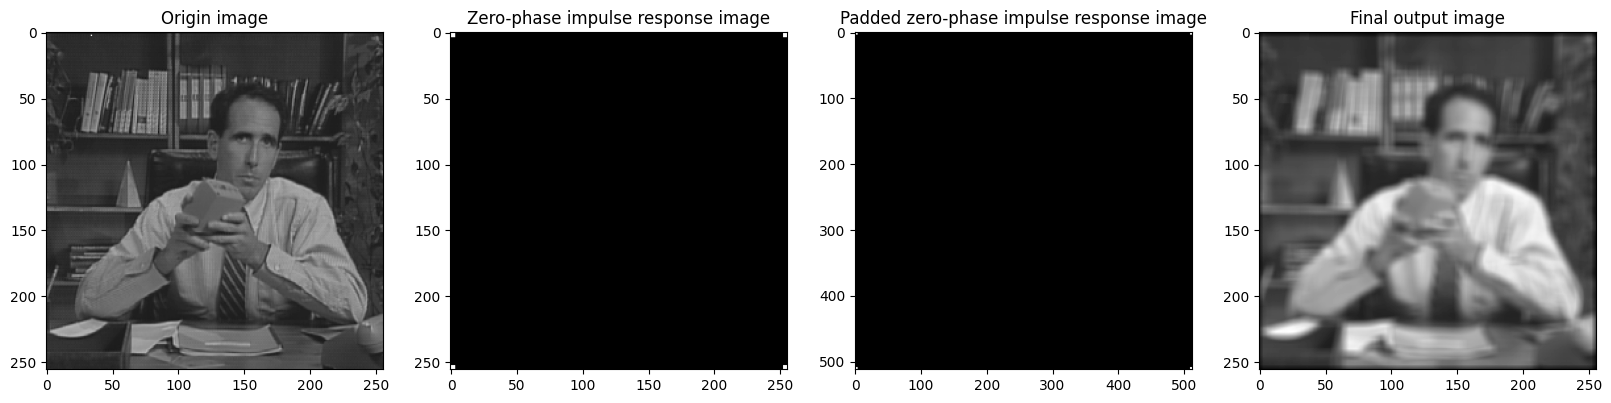

In [123]:
plt.figure(figsize=(20,8))

plt.subplot(1,4,1)
plt.title('Origin image')
plt.imshow(full_scale_contrast(img),cmap='gray')

plt.subplot(1,4,2)
plt.title('Zero-phase impulse response image')
plt.imshow(full_scale_contrast(H2),cmap='gray')

plt.subplot(1,4,3)
plt.title('Padded zero-phase impulse response image')
plt.imshow(full_scale_contrast(ZPI2),cmap='gray')

plt.subplot(1,4,4)
plt.title('Final output image')
plt.imshow(full_scale_contrast(FI2),cmap='gray')

In [124]:
#Verify that the output image is the same as the one in part (a)
#Y1a=img3, Y1c=FI2
Y1c=full_scale_contrast(FI2)
max_difference_before=np.max(np.abs(FI2-img3[3:262-3,3:262-3]))
max_difference_after=np.max(np.abs(Y1c-Y1a))
print('Sự khác nhau Y1a và Y1c (chưa full scale constrast): '+str(max_difference_before))
print('Sự khác nhau Y1a và Y1c (full scale constrast): '+str(max_difference_after))

Sự khác nhau Y1a và Y1c (chưa full scale constrast): 8.526512829121202e-14
Sự khác nhau Y1a và Y1c (full scale constrast): 0.0


## Phần 2

### Câu a

In [19]:
girl=read_file('girl2.bin',256)
girl_N=read_file('girl2Noise32.bin',256)
girl_NH=read_file('girl2Noise32Hi.bin',256)
#Hàm tính MSE
def mse(b,a=girl):
    return np.mean((b-a)**2)
mse_girl_N=mse(girl_N,girl)
mse_girl_NH=mse(girl_NH,girl)

MSE girl2Noise32 & girl2: 96.87025451660156
MSE girl2Noise32Hi & girl2: 95.12220764160156


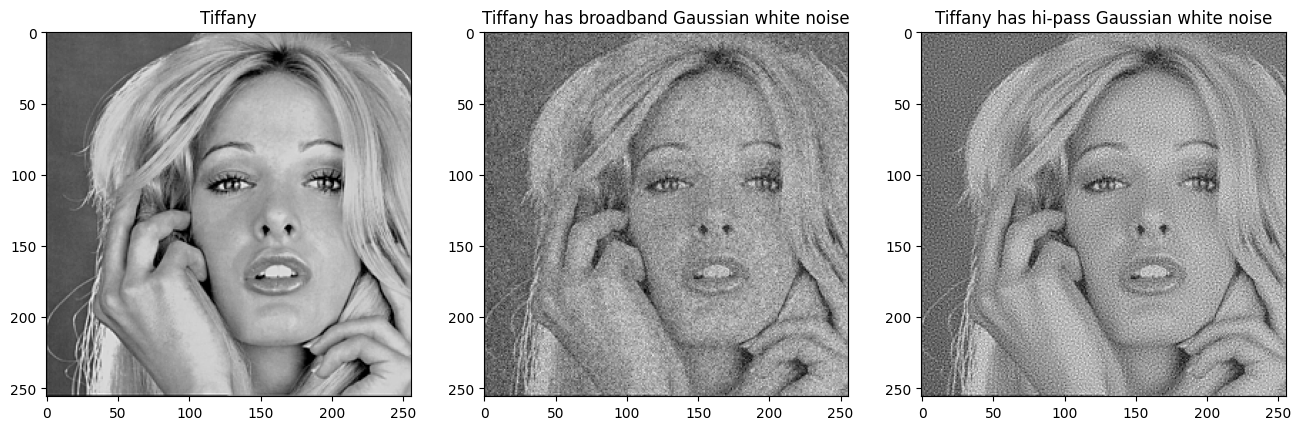

In [20]:
print('MSE girl2Noise32 & girl2: '+ str(mse_girl_N))
print('MSE girl2Noise32Hi & girl2: '+ str(mse_girl_NH))

plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('Tiffany')
plt.imshow(girl,cmap='gray')

plt.subplot(1,3,2)
plt.title('Tiffany has broadband Gaussian white noise')
plt.imshow(girl_N,cmap='gray')

plt.subplot(1,3,3)
plt.title('Tiffany has hi-pass Gaussian white noise')
plt.imshow(girl_NH,cmap='gray')

### Câu b

Hiện thực công thức low-pass filter
###### U_cutoff = 64;
###### [U,V] = meshgrid(-128:127,-128:127);
###### HLtildeCenter = double(sqrt(U.^2 + V.^2) <= U_cutoff);
###### HLtilde = fftshift(HLtildeCenter);

In [19]:
def apply_ideal_lpf(img,cutoff=64):
    # 2 mảng (mảng [-128,127] chạy hàng, chạy cột) (u,v)
    
    u,v=np.meshgrid(np.arange(-128,128),np.arange(-128,128)) #(-row//2,row//2),(-col//2,col//2)
    hltilde_center=np.double(np.sqrt(u**2+v**2)<=cutoff)
    hltilde=np.fft.fftshift(hltilde_center)
    
    result=np.fft.ifft2(np.fft.fft2(img)*hltilde).real # real để loại bỏ phức
    return result


In [20]:
#áp dụng filter
u_cutoff=64
lpf_girl=apply_ideal_lpf(girl,u_cutoff) # real để loại bỏ phức
lpf_girl_N=apply_ideal_lpf(girl_N,u_cutoff)
lpf_girl_NH=apply_ideal_lpf(girl_NH,u_cutoff)

#tính MSE cho hình sau khi áp dụng filter (lpf)
mse_lpf_girl=mse(lpf_girl,girl)
mse_lpf_girl_N=mse(lpf_girl_N,girl)
mse_lpf_girl_NH=mse(lpf_girl_NH,girl)

#tính ISNR
isnr_girl_N=10*np.log10(mse_girl_N/mse_lpf_girl_N)
isnr_girl_NH=10*np.log10(mse_girl_NH/mse_lpf_girl_NH)

In [21]:
print('MSE ideal low-pass filter on girl2: ',mse_lpf_girl)
print('MSE ideal low-pass filter on girl2Noise32: ',mse_lpf_girl_N)
print('ISNR ideal low-pass filter on girl2Noise32:',isnr_girl_N)
print('MSE ideal low-pass filter on girl2Noise32Hi: ',mse_lpf_girl_NH)
print('ISNR ideal low-pass filter on girl2Noise32Hi: ',isnr_girl_NH)

MSE ideal low-pass filter on girl2:  127.74808311981647
MSE ideal low-pass filter on girl2Noise32:  550.8786914157856
ISNR ideal low-pass filter on girl2Noise32: -7.548655329151717
MSE ideal low-pass filter on girl2Noise32Hi:  398.99781881247645
ISNR ideal low-pass filter on girl2Noise32Hi:  -6.22688600509425


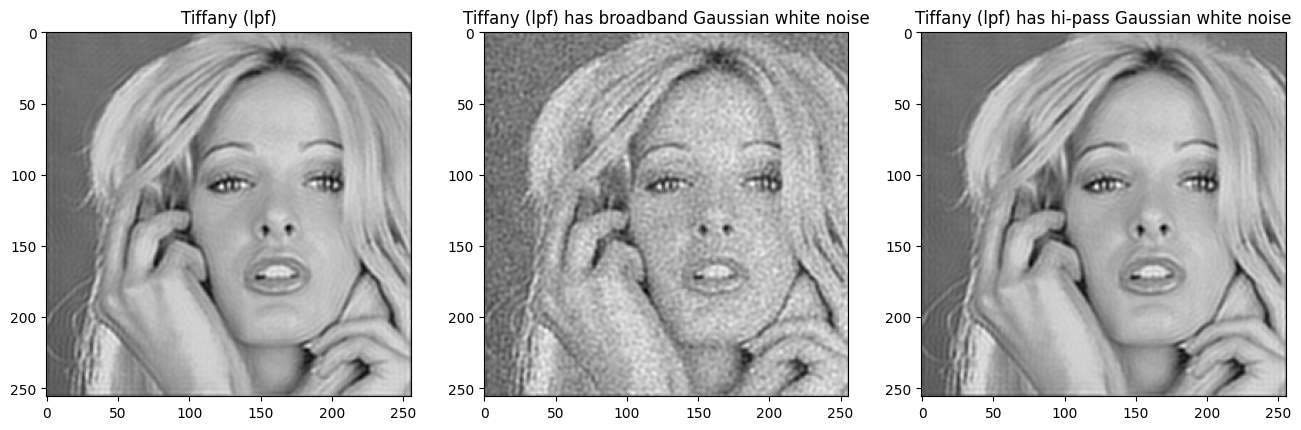

In [22]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('Tiffany (lpf)')
plt.imshow(full_scale_contrast(lpf_girl),cmap='gray')

plt.subplot(1,3,2)
plt.title('Tiffany (lpf) has broadband Gaussian white noise')
plt.imshow(full_scale_contrast(lpf_girl_N),cmap='gray')

plt.subplot(1,3,3)
plt.title('Tiffany (lpf) has hi-pass Gaussian white noise')
plt.imshow(full_scale_contrast(lpf_girl_NH),cmap='gray')

### Câu c

Hiện thực công thức
###### U_cutoff_H = 64;
###### SigmaH = 0.19 * 256 / U_cutoff_H;
###### [U,V] = meshgrid(-128:127,-128:127);
###### HtildeCenter = exp((-2*pi^2*SigmaH^2)/(256.^2)*(U.^2 + V.^2));
###### Htilde = fftshift(HtildeCenter);
###### H = ifft2(Htilde);
###### H2 = fftshift(H);
###### ZPH2 = zeros(512,512);
###### ZPH2(1:256,1:256) = H2;

In [9]:
def apply_ideal_lpf_gaussian(img,cutoff=64):
    sigma_h=0.19*256/ cutoff
    u,v=np.meshgrid(np.arange(-128,128),np.arange(-128,128)) #(-row//2,row//2),(-col//2,col//2)
    
    htilde_center=np.exp((-2*np.pi**(2*sigma_h**2))/((256**2)*(u**2+v**2)))
    htilde=np.fft.fftshift(htilde_center)
    
    H = np.fft.ifft2(htilde).real
    H2=np.fft.fftshift(H)
    
    ZPH2=np.zeros((512,512))
    ZPH2[:256,:256]=H2
    
    ZPO3=np.zeros((512,512))
    ZPO3[:256,:256]=img

    result=np.fft.ifft2(np.fft.fft2(ZPO3)*np.fft.fft2(ZPH2)).real
    return result[128:384,128:384]

In [10]:
#Áp dụng vào các hình gaussian lpf
u_cutoff_h=64
glpf_girl=apply_ideal_lpf_gaussian(girl,u_cutoff_h)
glpf_girl_N=apply_ideal_lpf_gaussian(girl_N,u_cutoff_h)
glpf_girl_NH=apply_ideal_lpf_gaussian(girl_NH,u_cutoff_h)

#Tính MSE
mse_glpf_girl=mse(glpf_girl,girl)
mse_glpf_girl_N=mse(glpf_girl_N,girl)
mse_glpf_girl_NH=mse(glpf_girl_NH,girl)

#Tính ISNR
isnr_glpf_girl_N=10*np.log10(mse_girl_N/mse_glpf_girl_N)
isnr_glpf_girl_NH=10*np.log10(mse_girl_NH/mse_glpf_girl_NH)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2772\1601291477.py:5: RuntimeWarning: divide by zero encountered in divide
  htilde_center=np.exp((-2*np.pi**(2*sigma_h**2))/((256**2)*(u**2+v**2)))


In [11]:
print('MSE ideal low-pass filter on girl2: ',mse_glpf_girl)
print('MSE ideal low-pass filter on girl2Noise32: ',mse_glpf_girl_N)
print('ISNR ideal low-pass filter on girl2Noise32:',isnr_glpf_girl_N)
print('MSE ideal low-pass filter on girl2Noise32Hi: ',mse_glpf_girl_NH)
print('ISNR ideal low-pass filter on girl2Noise32Hi: ',isnr_glpf_girl_NH)

MSE ideal low-pass filter on girl2:  7444.556129534407
MSE ideal low-pass filter on girl2Noise32:  8647.940970121037
ISNR ideal low-pass filter on girl2Noise32: -19.50722275707478
MSE ideal low-pass filter on girl2Noise32Hi:  8226.324603704968
ISNR ideal low-pass filter on girl2Noise32Hi:  -19.369239213573522


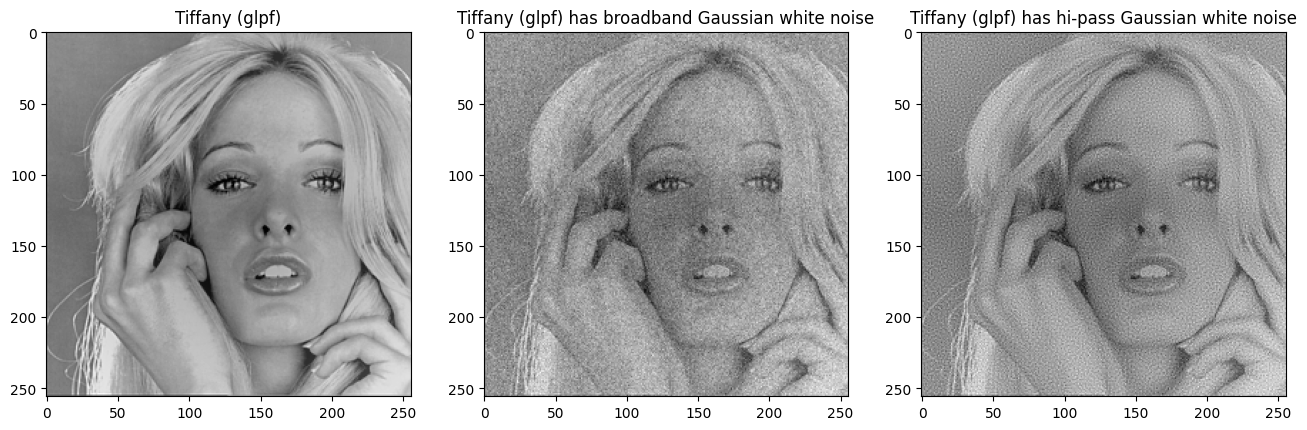

In [12]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('Tiffany (glpf)')
plt.imshow(full_scale_contrast(glpf_girl),cmap='gray')

plt.subplot(1,3,2)
plt.title('Tiffany (glpf) has broadband Gaussian white noise')
plt.imshow(full_scale_contrast(glpf_girl_N),cmap='gray')

plt.subplot(1,3,3)
plt.title('Tiffany (glpf) has hi-pass Gaussian white noise')
plt.imshow(full_scale_contrast(glpf_girl_NH),cmap='gray')

### Câu d

In [35]:
#Áp dụng vào các hình gaussian lpf
u_cutoff_h=77.5
glpf_girl2=apply_ideal_lpf_gaussian(girl,u_cutoff_h)
glpf_girl_N2=apply_ideal_lpf_gaussian(girl_N,u_cutoff_h)
glpf_girl_NH2=apply_ideal_lpf_gaussian(girl_NH,u_cutoff_h)

#Tính MSE
mse_glpf_girl2=mse(glpf_girl2,girl)
mse_glpf_girl_N2=mse(glpf_girl_N2,girl)
mse_glpf_girl_NH2=mse(glpf_girl_NH2,girl)

#Tính ISNR
isnr_glpf_girl_N2=10*np.log10(mse_girl_N/mse_glpf_girl_N2)
isnr_glpf_girl_NH2=10*np.log10(mse_girl_NH/mse_glpf_girl_NH2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3440\2609406905.py:5: RuntimeWarning: divide by zero encountered in divide
  htilde_center=np.exp((-2*np.pi**(2*sigma_h**2))/((256**2)*(u**2+v**2)))


In [36]:
print('MSE ideal low-pass filter on girl2: ',mse_glpf_girl2)
print('MSE ideal low-pass filter on girl2Noise32: ',mse_glpf_girl_N2)
print('ISNR ideal low-pass filter on girl2Noise32:',isnr_glpf_girl_N2)
print('MSE ideal low-pass filter on girl2Noise32Hi: ',mse_glpf_girl_NH2)
print('ISNR ideal low-pass filter on girl2Noise32Hi: ',isnr_glpf_girl_NH2)

MSE ideal low-pass filter on girl2:  7444.221676356766
MSE ideal low-pass filter on girl2Noise32:  8647.60968205747
ISNR ideal low-pass filter on girl2Noise32: -19.50705638298142
MSE ideal low-pass filter on girl2Noise32Hi:  8225.989108651458
ISNR ideal low-pass filter on girl2Noise32Hi:  -19.3690620911906


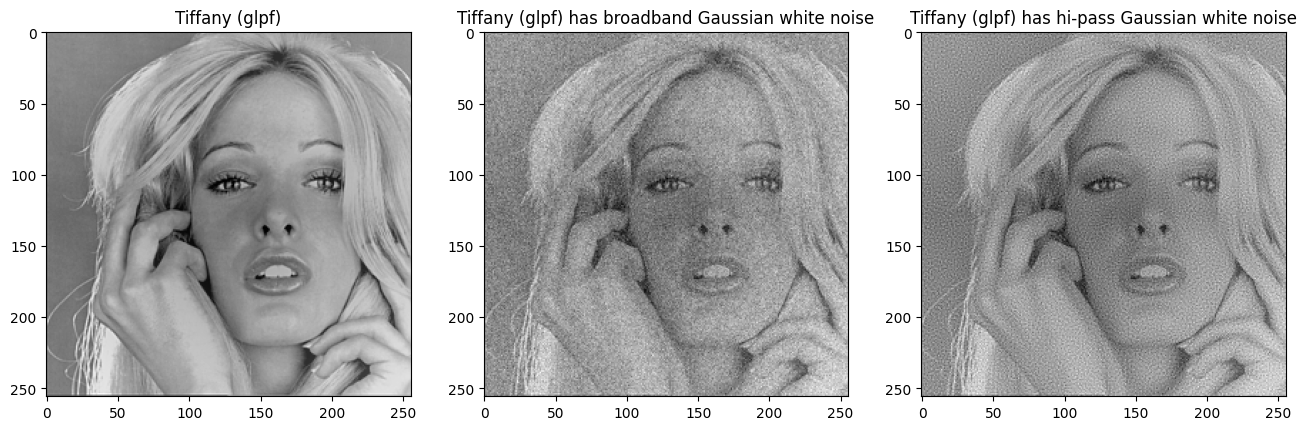

In [37]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('Tiffany (glpf)')
plt.imshow(full_scale_contrast(glpf_girl2),cmap='gray')

plt.subplot(1,3,2)
plt.title('Tiffany (glpf) has broadband Gaussian white noise')
plt.imshow(full_scale_contrast(glpf_girl_N2),cmap='gray')

plt.subplot(1,3,3)
plt.title('Tiffany (glpf) has hi-pass Gaussian white noise')
plt.imshow(full_scale_contrast(glpf_girl_NH2),cmap='gray')